In [1]:
import pandas as pd
import sys
import os

In [2]:
from text_processing import preprocess_text

In [3]:
dataset_scopus = pd.read_csv('dataset/data_scopus_raw.csv')
dataset_scopus

,abstract,title,DOI,created,score,URL,journal
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,['Taxonomy and systematics of the fungus-growi...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology
4,<jats:p>\n Supplementary files. &lt;br /&gt...,['In search of lost ergots: phylogenetic re-ev...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology
...,...,...,...,...,...,...,...
2447,<jats:title>ABSTRACT</jats:title><jats:p>Recen...,['Is There a Risk Premium in the Stock Lending...,10.1111/jofi.13129,"{'date-parts': [[2022, 4, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13129,Journal of Finance
2448,<jats:title>ABSTRACT</jats:title><jats:p>We pr...,['Bayesian Solutions for the Factor Zoo: We Ju...,10.1111/jofi.13197,"{'date-parts': [[2022, 12, 10]], 'date-time': ...",0.0,http://dx.doi.org/10.1111/jofi.13197,Journal of Finance
2449,<jats:title>ABSTRACT</jats:title><jats:p>In th...,['Presidential Address: Sustainable Finance an...,10.1111/jofi.13255,"{'date-parts': [[2023, 6, 20]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13255,Journal of Finance
2450,<jats:title>ABSTRACT</jats:title><jats:p>This ...,['Long‐Run Risk: Is It There?'],10.1111/jofi.13126,"{'date-parts': [[2022, 3, 29]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13126,Journal of Finance


In [4]:
dataset_scopus[dataset_scopus.journal == 'Cell Metabolism']

,abstract,title,DOI,created,score,URL,journal
174,NaN,['Bone marrow immune cells stop weight regain'],10.1016/j.cmet.2023.10.004,"{'date-parts': [[2023, 11, 7]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.cmet.2023.10.004,Cell Metabolism
175,NaN,['Meet the author: Professor Zhijian Cai'],10.1016/j.cmet.2023.07.007,"{'date-parts': [[2023, 8, 8]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.cmet.2023.07.007,Cell Metabolism
176,NaN,['All hands on deck: Adipocytes lept-in to dri...,10.1016/j.cmet.2023.11.007,"{'date-parts': [[2023, 12, 5]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.cmet.2023.11.007,Cell Metabolism
177,NaN,['Statins aggravate insulin resistance through...,10.1016/j.cmet.2023.12.027,"{'date-parts': [[2024, 2, 6]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.cmet.2023.12.027,Cell Metabolism
178,NaN,['Methionine restriction forces Epstein-Barr v...,10.1016/j.cmet.2022.08.009,"{'date-parts': [[2022, 9, 6]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.cmet.2022.08.009,Cell Metabolism
...,...,...,...,...,...,...,...
618,NaN,['Neuregulin 4 suppresses NASH-HCC development...,10.1016/j.cmet.2022.07.010,"{'date-parts': [[2022, 8, 15]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.cmet.2022.07.010,Cell Metabolism
619,NaN,['Phosphoproteomics of three exercise modaliti...,10.1016/j.cmet.2022.07.003,"{'date-parts': [[2022, 7, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.cmet.2022.07.003,Cell Metabolism
620,NaN,['Targeting p21Cip1 highly expressing cells in...,10.1016/j.cmet.2021.12.014,"{'date-parts': [[2022, 1, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.cmet.2021.12.014,Cell Metabolism
621,NaN,['The hallmarks of cancer metabolism: Still em...,10.1016/j.cmet.2022.01.007,"{'date-parts': [[2022, 2, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.cmet.2022.01.007,Cell Metabolism


In [5]:
dataset_scopus[dataset_scopus.journal == 'Engineering Geology']

,abstract,title,DOI,created,score,URL,journal
1252,NaN,['Physics-guided genetic programming for predi...,10.1016/j.enggeo.2023.107031,"{'date-parts': [[2023, 2, 6]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.enggeo.2023.107031,Engineering Geology
1253,NaN,['Simple modelling of fast hydration processes...,10.1016/j.enggeo.2023.107028,"{'date-parts': [[2023, 2, 1]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.enggeo.2023.107028,Engineering Geology
1254,NaN,['Shear-wave velocity model of reference site ...,10.1016/j.enggeo.2023.107200,"{'date-parts': [[2023, 6, 12]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.enggeo.2023.107200,Engineering Geology
1255,NaN,['Editorial Board'],10.1016/s0013-7952(22)00374-x,"{'date-parts': [[2022, 10, 8]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/s0013-7952(22)00374-x,Engineering Geology
1256,NaN,['Geotechnical characterisation of coal spoil ...,10.1016/j.enggeo.2024.107406,"{'date-parts': [[2024, 1, 6]], 'date-time': '2...",0.0,http://dx.doi.org/10.1016/j.enggeo.2024.107406,Engineering Geology
...,...,...,...,...,...,...,...
2051,NaN,['Investigation of the real contact area of te...,10.1016/j.enggeo.2023.107010,"{'date-parts': [[2023, 1, 10]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.enggeo.2023.107010,Engineering Geology
2052,NaN,['Numerical investigation on origin and evolut...,10.1016/j.enggeo.2022.106913,"{'date-parts': [[2022, 11, 8]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.enggeo.2022.106913,Engineering Geology
2053,NaN,['Steady rheological behavior and unified stre...,10.1016/j.enggeo.2023.107058,"{'date-parts': [[2023, 2, 26]], 'date-time': '...",0.0,http://dx.doi.org/10.1016/j.enggeo.2023.107058,Engineering Geology
2054,NaN,['Acoustic emission response and evolution of ...,10.1016/j.enggeo.2022.106930,"{'date-parts': [[2022, 11, 21]], 'date-time': ...",0.0,http://dx.doi.org/10.1016/j.enggeo.2022.106930,Engineering Geology


In [6]:
dataset_scopus.drop_duplicates(inplace=True)
dataset_scopus.dropna(inplace=True)
dataset_scopus

,abstract,title,DOI,created,score,URL,journal
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,['Supplementary files'],10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,['Taxonomy and systematics of the fungus-growi...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology
4,<jats:p>\n Supplementary files. &lt;br /&gt...,['In search of lost ergots: phylogenetic re-ev...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology
...,...,...,...,...,...,...,...
2447,<jats:title>ABSTRACT</jats:title><jats:p>Recen...,['Is There a Risk Premium in the Stock Lending...,10.1111/jofi.13129,"{'date-parts': [[2022, 4, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13129,Journal of Finance
2448,<jats:title>ABSTRACT</jats:title><jats:p>We pr...,['Bayesian Solutions for the Factor Zoo: We Ju...,10.1111/jofi.13197,"{'date-parts': [[2022, 12, 10]], 'date-time': ...",0.0,http://dx.doi.org/10.1111/jofi.13197,Journal of Finance
2449,<jats:title>ABSTRACT</jats:title><jats:p>In th...,['Presidential Address: Sustainable Finance an...,10.1111/jofi.13255,"{'date-parts': [[2023, 6, 20]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13255,Journal of Finance
2450,<jats:title>ABSTRACT</jats:title><jats:p>This ...,['Long‐Run Risk: Is It There?'],10.1111/jofi.13126,"{'date-parts': [[2022, 3, 29]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13126,Journal of Finance


In [7]:
dataset_scopus.groupby(['journal']).count()

,abstract,title,DOI,created,score,URL
journal,,,,,,
Administrative Science Quarterly,58,58,58,58,58,58
Annual Review of Astronomy and Astrophysics,25,25,25,25,25,25
Artificial Intelligence Review,200,200,200,200,200,200
Journal of Finance,174,174,174,174,174,174
Progress in Orthodontics,114,114,114,114,114,114
Studies in Mycology,39,39,39,39,39,39


In [8]:
dataset_scopus.title = dataset_scopus.title.apply(lambda x : '{} '.format(eval(x)[0]))
dataset_scopus['data'] = dataset_scopus.title + dataset_scopus.abstract
dataset_scopus

,abstract,title,DOI,created,score,URL,journal,data
0,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.01supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...
1,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.101.02supp,"{'date-parts': [[2023, 3, 25]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.101.02supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...
2,<jats:p>\n <jats:bold>Fig. S1.</jats:bold> ...,Supplementary files,10.3114/sim.2022.102.01supp,"{'date-parts': [[2023, 3, 23]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.102.01supp,Studies in Mycology,Supplementary files <jats:p>\n <jats:bold>F...
3,<jats:p>\n Supplementary files:&lt;br /&gt;...,Taxonomy and systematics of the fungus-growing...,10.3114/sim.2023.106.06-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2023.106.06-supp,Studies in Mycology,Taxonomy and systematics of the fungus-growing...
4,<jats:p>\n Supplementary files. &lt;br /&gt...,In search of lost ergots: phylogenetic re-eval...,10.3114/sim.2022.106.01-supp,"{'date-parts': [[2024, 2, 27]], 'date-time': '...",0.0,http://dx.doi.org/10.3114/sim.2022.106.01-supp,Studies in Mycology,In search of lost ergots: phylogenetic re-eval...
...,...,...,...,...,...,...,...,...
2447,<jats:title>ABSTRACT</jats:title><jats:p>Recen...,Is There a Risk Premium in the Stock Lending M...,10.1111/jofi.13129,"{'date-parts': [[2022, 4, 4]], 'date-time': '2...",0.0,http://dx.doi.org/10.1111/jofi.13129,Journal of Finance,Is There a Risk Premium in the Stock Lending M...
2448,<jats:title>ABSTRACT</jats:title><jats:p>We pr...,Bayesian Solutions for the Factor Zoo: We Just...,10.1111/jofi.13197,"{'date-parts': [[2022, 12, 10]], 'date-time': ...",0.0,http://dx.doi.org/10.1111/jofi.13197,Journal of Finance,Bayesian Solutions for the Factor Zoo: We Just...
2449,<jats:title>ABSTRACT</jats:title><jats:p>In th...,Presidential Address: Sustainable Finance and ...,10.1111/jofi.13255,"{'date-parts': [[2023, 6, 20]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13255,Journal of Finance,Presidential Address: Sustainable Finance and ...
2450,<jats:title>ABSTRACT</jats:title><jats:p>This ...,Long‐Run Risk: Is It There?,10.1111/jofi.13126,"{'date-parts': [[2022, 3, 29]], 'date-time': '...",0.0,http://dx.doi.org/10.1111/jofi.13126,Journal of Finance,Long‐Run Risk: Is It There? <jats:title>ABSTRA...


In [9]:
cleaned_data = dataset_scopus.data.apply(preprocess_text)
cleaned_data

0       supplementary files      fig s phylogenetic tr...
1       supplementary files      fig s phylogenetic tr...
2       supplementary files      fig s multilocus phyl...
3       taxonomy and systematics of the fungusgrowing ...
4       in search of lost ergots phylogenetic reevalua...
                              ...                        
2447    recent research argues that uncertainty about ...
2448    we propose a novel framework for analyzing lin...
2449    in this address i discuss differences across i...
2450    this paper documents the existence of a persis...
2451    we develop a method that identifies the attent...
Name: data, Length: 610, dtype: object

In [10]:
dataset_scopus['cleaned_data'] = cleaned_data

(array([ 11., 170.,  47., 106., 152.,  68.,  42.,  10.,   2.,   2.]),
 array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. , 307.2, 358.4, 409.6,
        460.8, 512. ]),
 <BarContainer object of 10 artists>)

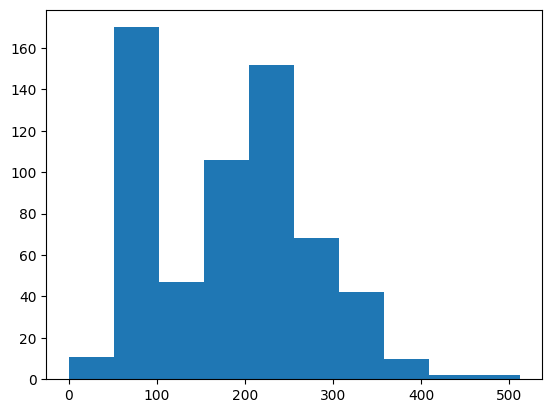

In [11]:
import matplotlib.pyplot as plt

word_count = dataset_scopus.cleaned_data.apply(lambda x : len(x.split()))
plt.hist(word_count)

In [12]:
dataset_scopus['word'] = word_count
dataset_scopus[dataset_scopus.word <= 10]

,abstract,title,DOI,created,score,URL,journal,data,cleaned_data,word
625,<jats:title>Abstract</jats:title><jats:p>The P...,Portia spider algorithm: an evolutionary compu...,10.1007/s10462-023-10683-1,"{'date-parts': [[2024, 1, 31]], 'date-time': '...",0.0,http://dx.doi.org/10.1007/s10462-023-10683-1,Artificial Intelligence Review,Portia spider algorithm: an evolutionary compu...,,0
691,<jats:title>Abstract</jats:title><jats:p>The u...,People versus machines: introducing the HIRE f...,10.1007/s10462-022-10193-6,"{'date-parts': [[2022, 5, 6]], 'date-time': '2...",0.0,http://dx.doi.org/10.1007/s10462-022-10193-6,Artificial Intelligence Review,People versus machines: introducing the HIRE f...,,0
825,<jats:title>Abstract</jats:title><jats:p>Total...,New formulation for predicting total dissolved...,10.1007/s10462-024-10707-4,"{'date-parts': [[2024, 3, 9]], 'date-time': '2...",0.0,http://dx.doi.org/10.1007/s10462-024-10707-4,Artificial Intelligence Review,New formulation for predicting total dissolved...,,0
2073,<jats:title>Abstract</jats:title><jats:sec>\n ...,Angiotensin(1-7) attenuates tooth movement and...,10.1186/s40510-023-00486-z,"{'date-parts': [[2023, 10, 16]], 'date-time': ...",0.0,http://dx.doi.org/10.1186/s40510-023-00486-z,Progress in Orthodontics,Angiotensin(1-7) attenuates tooth movement and...,,0


In [13]:
dataset_scopus.data[625], preprocess_text(dataset_scopus.data[625])

('Portia spider algorithm: an evolutionary computation approach for engineering application <jats:title>Abstract</jats:title><jats:p>The Portia spider, a notable member of the jumping spider family (Salticidae), is widely recognized for its intricate hunting strategies and remarkable problem-solving prowess. Several species fall under the “Portia” genus, with habitats spanning regions in Africa, Asia, and Australia. Demonstrating the ability to tackle new challenges, these spiders can learn and adapt their strategies based on prior experiences. This study introduces the Portia Spider Algorithm (PSA), a swarm-based technique inspired by the unique predatory strategies of the Portia spider. We conducted rigorous assessments of PSA performance against 23 classical test functions, 29 CEC2017 test cases, and 5 engineering optimization tasks. To demonstrate the effectiveness of the PSA, outcomes were juxtaposed with those of renowned algorithms. This paper explores the mechanics, advantages,

In [15]:
dataset_scopus.dropna(inplace=True)
dataset_scopus.to_csv('dataset/data_scopus_cleaned.csv', index=False)